In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Walmart_Store_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.shape

(6435, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
#Store with the maximum sales
store_maximum_sales = data.groupby("Store")["Weekly_Sales"].sum().idxmax()
store_maximum_sales

20

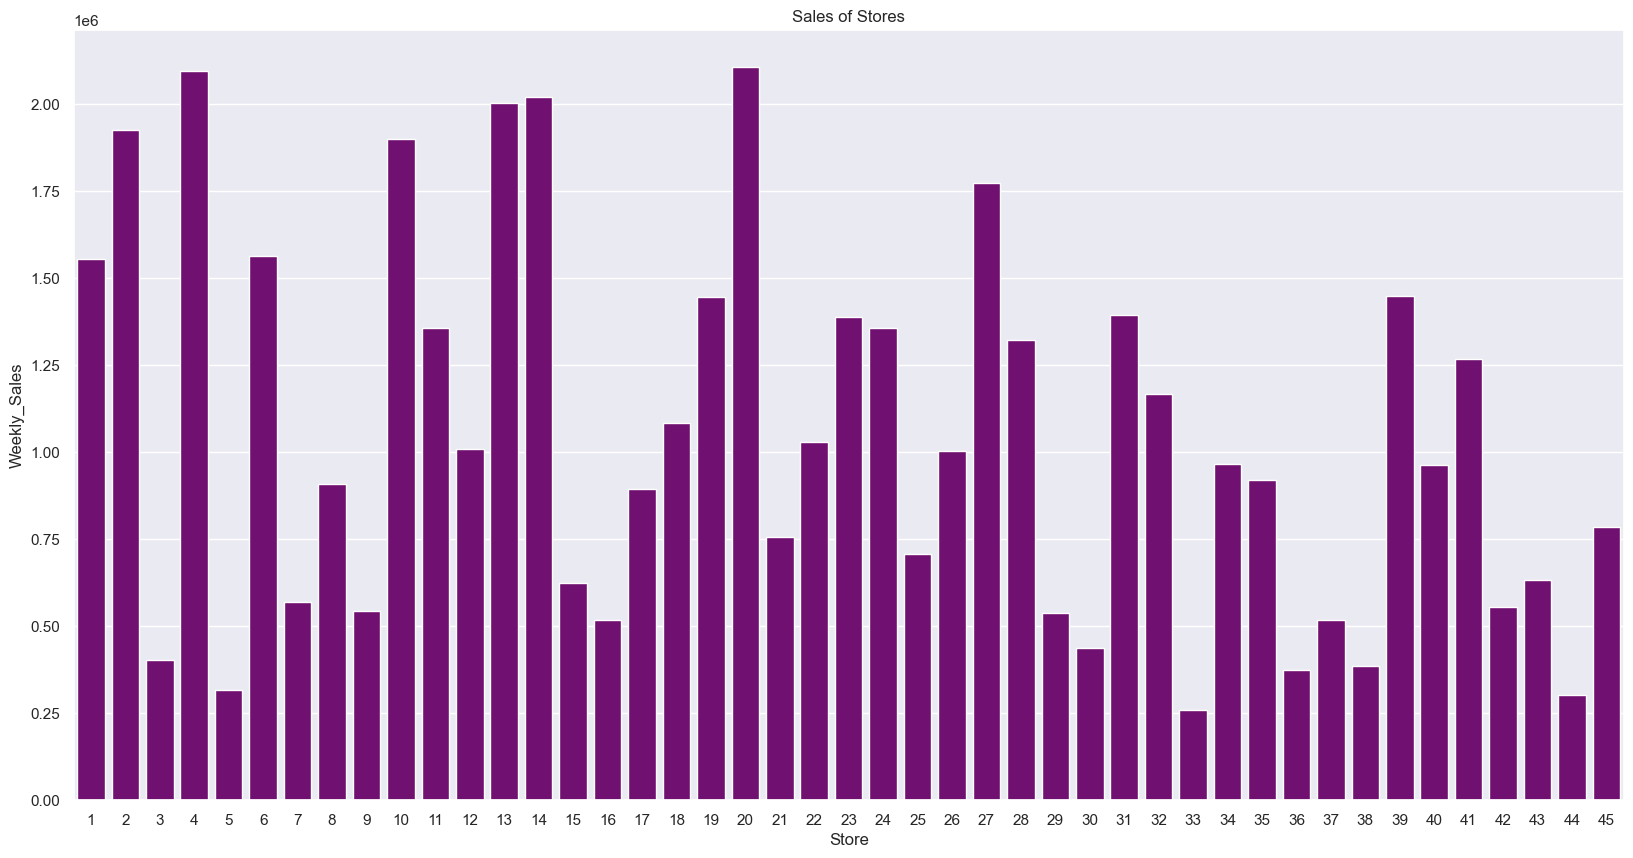

In [11]:
#Store with the maximum sales
sns.set(rc = {"figure.figsize":(20,10)})
sns.barplot(x = "Store",y="Weekly_Sales",data = data,errorbar = None,color = "purple")
plt.title("Sales of Stores")
plt.show()

In [12]:
# Which store has maximum standard deviation 
store_maximum_std = data.groupby("Store")["Weekly_Sales"].std().reset_index()
store_maximum_std.head()

,Store,Weekly_Sales
0,1,155980.767761
1,2,237683.694682
2,3,46319.631557
3,4,266201.442297
4,5,37737.965745


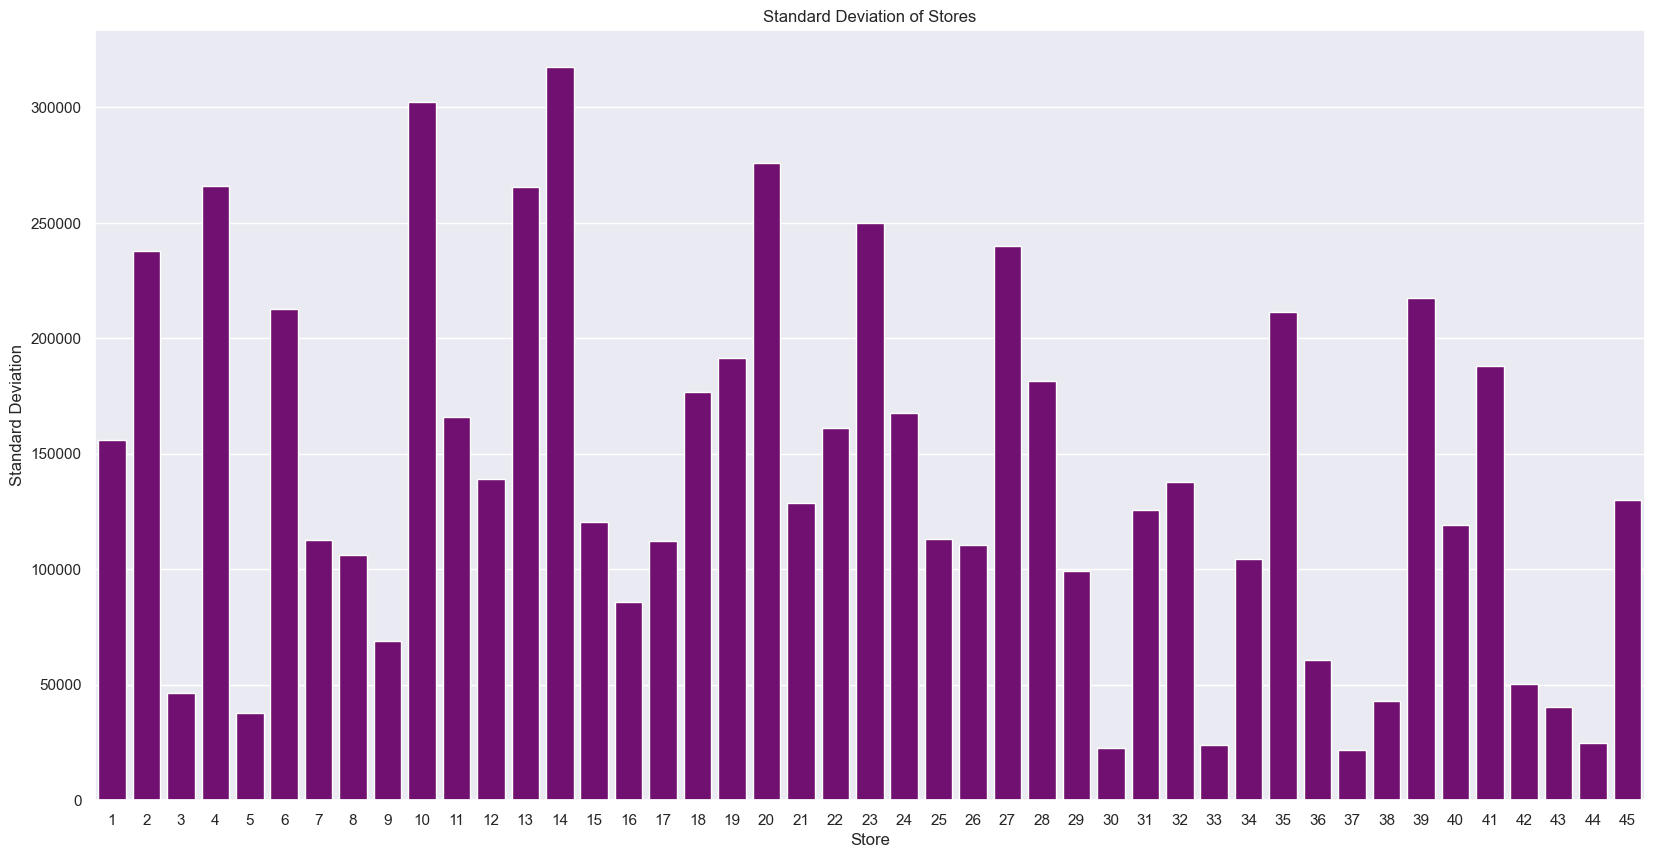

In [13]:
sns.set(rc = {"figure.figsize":(20,10)})
sns.barplot(x = "Store", y= "Weekly_Sales",data = store_maximum_std,errorbar = None,color = "purple")
plt.title("Standard Deviation of Stores")
plt.xlabel("Store")
plt.ylabel("Standard Deviation")
plt.show()

#### The highest sales are for store 20 and the highest standard deviation from the graph is for store 14.

In [46]:
#Which store/s has good quarterly growth rate in Q3’2012
data["Date"] = pd.to_datetime(data["Date"],format = 'mixed')
data["quarterly"] = data["Date"].dt.quarter
data_2012 = data[data["Date"] >= "2012"]
data_Q2_Q3_2012 = data_2012[(data_2012["quarterly"] == 3) | (data_2012["quarterly"] == 2)]

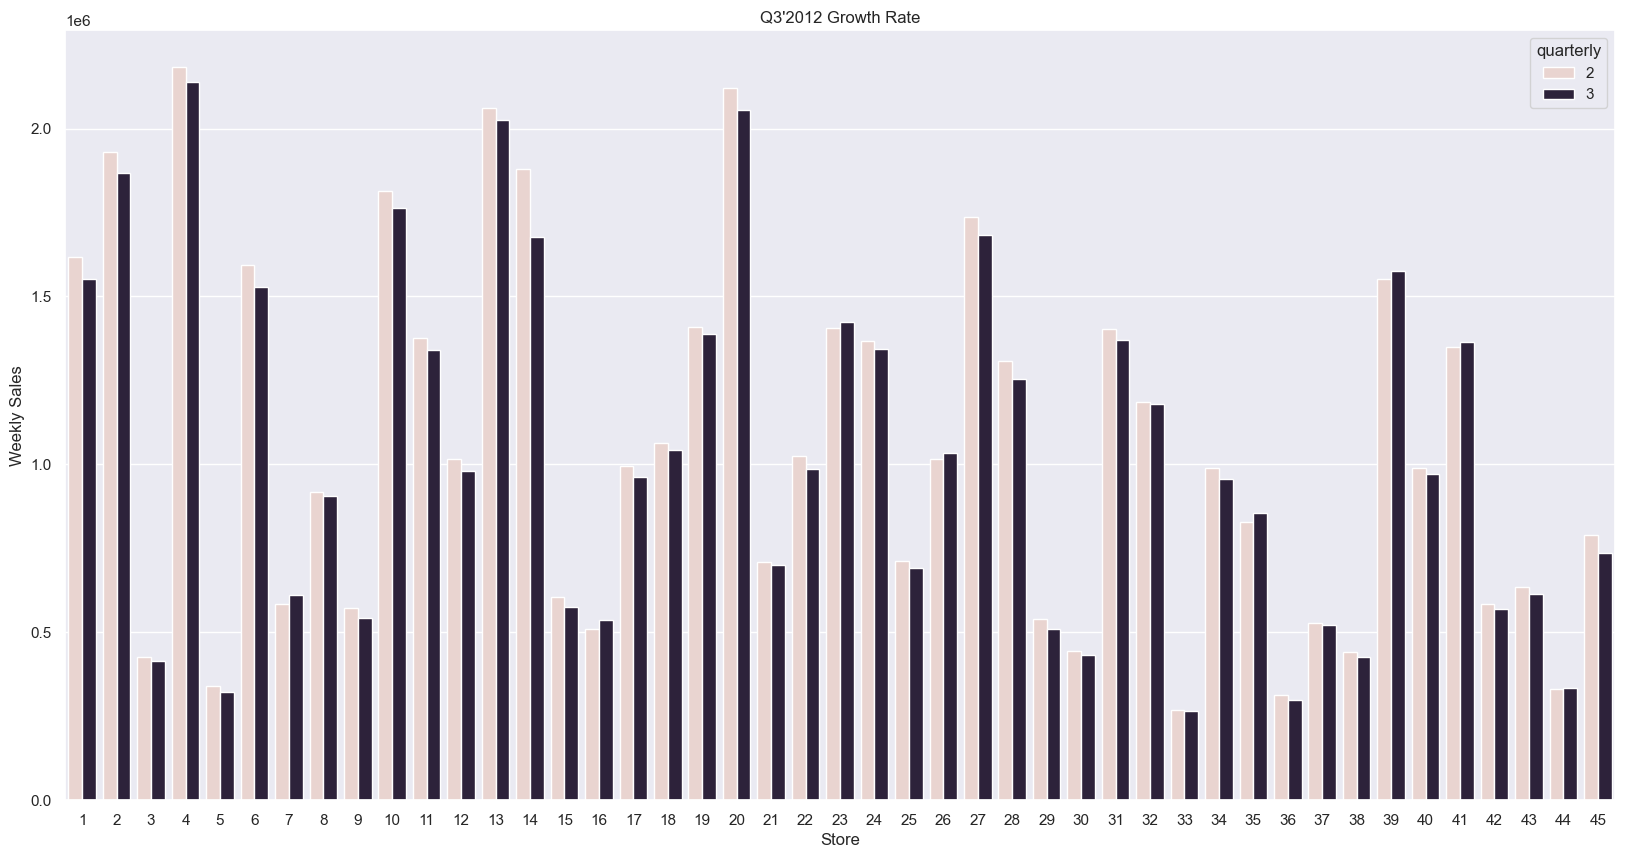

In [48]:
sns.set(rc = {"figure.figsize":(20,10)})
sns.barplot(x = "Store",y = "Weekly_Sales", data = data_Q2_Q3_2012, hue = "quarterly",errorbar = None)
plt.title("Q3'2012 Growth Rate")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

### From the graph we can analyze that stores 7, 16, 23, 26, 35, 39, 41, and 44 have a better growth rate in Q3'2012

In [51]:
#coefficient of mean to standard deviation
coefficient_mean_std = (data.groupby("Store")["Weekly_Sales"].std()/data.groupby("Store")["Weekly_Sales"].sum())

In [53]:
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
non_holiday = data[data["Holiday_Flag"] == 0]
holiday = data[data["Holiday_Flag"] == 1]
mean_nonholiday = non_holiday["Weekly_Sales"].mean()
higher_sales_holidays = holiday[holiday["Weekly_Sales"] > mean_nonholiday]

In [54]:
#Provide a monthly and semester view of sales in units and give insights
data["month"] = data["Date"].dt.month

In [55]:
data["semester"] = np.where(data["quarterly"].isin([1,2]),1,2)

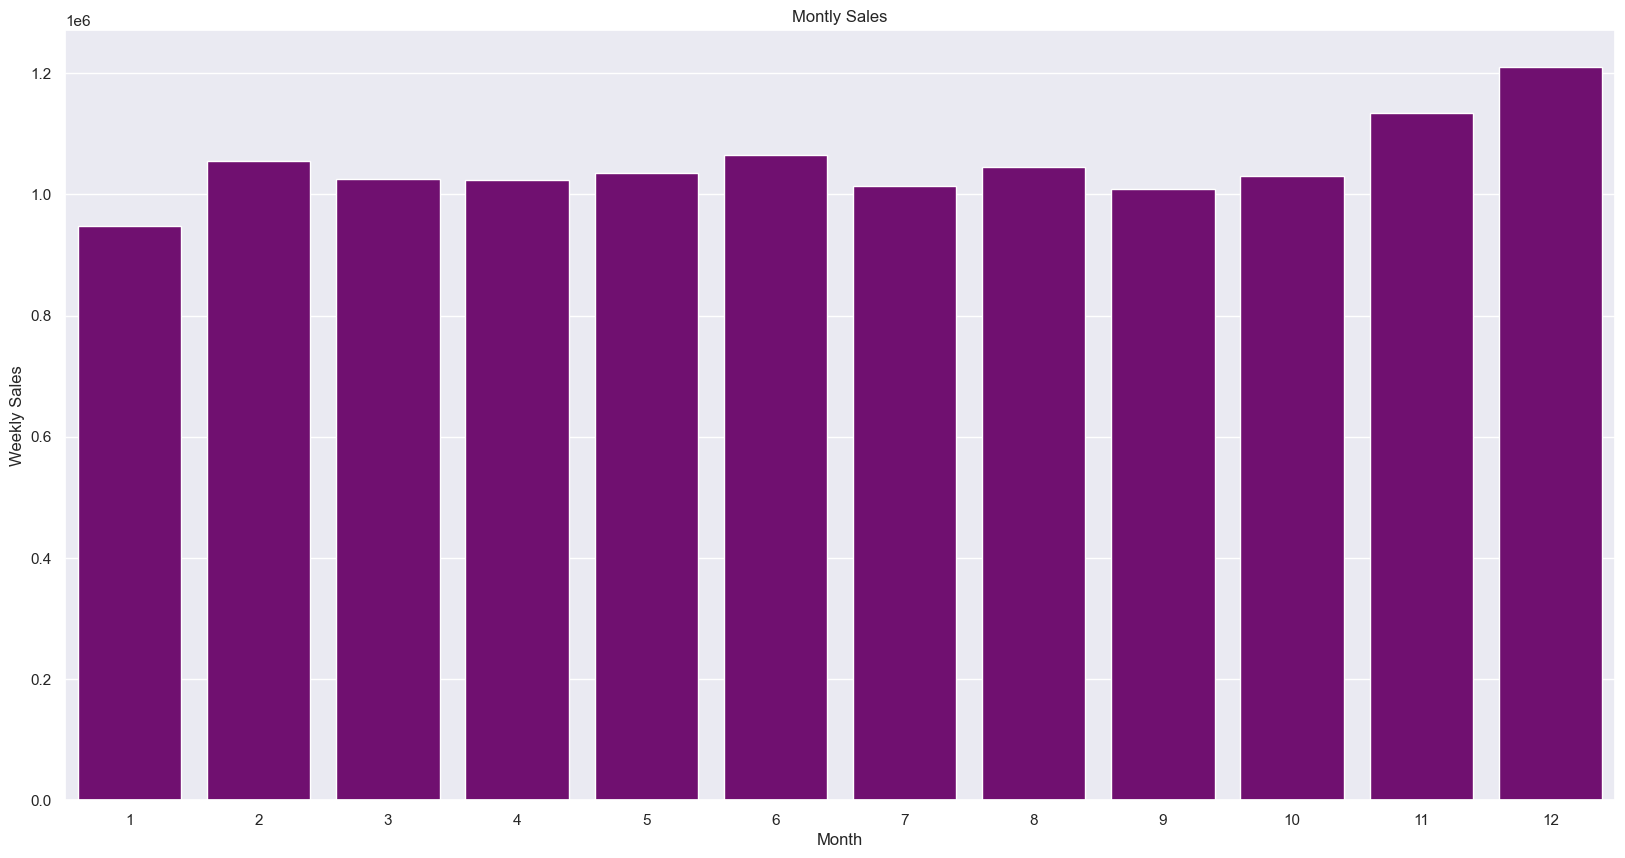

In [56]:
sns.set(rc = {"figure.figsize":(20,10)})
sns.barplot(x = "month", y = "Weekly_Sales", data = data, errorbar = None, color = 'purple')
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.title("Montly Sales")
plt.show()

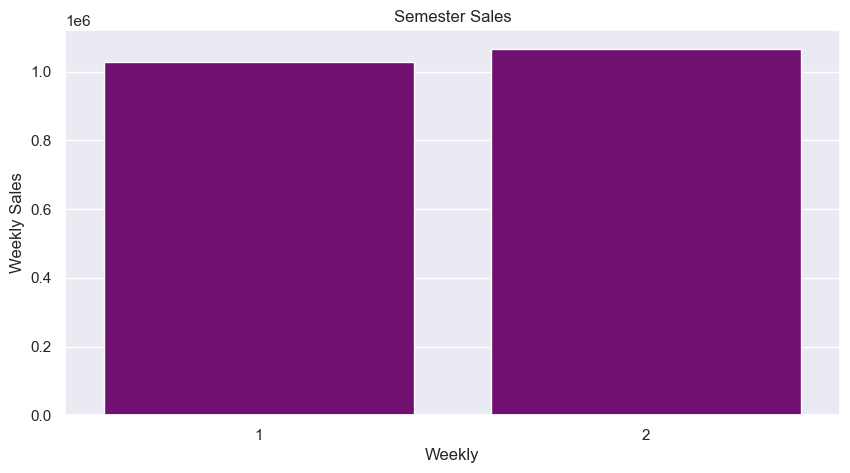

In [57]:
sns.set(rc = {"figure.figsize":(10,5)})
sns.barplot(x = "semester", y = "Weekly_Sales", data = data, errorbar = None, color = 'purple')
plt.xlabel("Weekly")
plt.ylabel("Weekly Sales")
plt.title("Semester Sales")
plt.show()

### Insights
For monthly sales, the highest is in December, and the lowest is in January. Throughout the year, sales are almost constant for all months, and we can see a rise after October. So, the Thanksgiving and Christmas holidays help increase sales significantly. 
Similarly, the second semester(last 6 months) has higher sales than the first semester because of the Christmas and Thanksgiving holidays.

In [59]:
data_1["day"] = data_1["Date"].dt.day

NameError: name 'data_1' is not defined

In [60]:
data['Sequential_Date'] = data['Date'].rank(method='dense').astype(int)
data.sort_values("Sequential_Date")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarterly,month,semester,Sequential_Date
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,1,1,1,1
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,1,1,1,1
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,1,1,1,1
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,1,1,1,1
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195,4,12,2,143
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847,4,12,2,143
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943,4,12,2,143
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293,4,12,2,143


In [61]:
data_1 = data[data["Store"] == 1]

In [64]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
relevant = ols("Weekly_Sales ~ CPI+Fuel_Price+Unemployment",data = data).fit()

In [66]:
print(relevant.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     51.75
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           4.81e-33
Time:                        05:47:25   Log-Likelihood:                -94275.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.746e+06   7.96e+04     21.938   

### From the model summary we can see that Fuel_price is not significant because the P-value is >=0.05 and CPI and Unemployment are both signficant and cannot be dropped

In [69]:
X = data_1.drop(["Weekly_Sales","Fuel_Price","month","quarterly","semester","Date"],axis = 1)
y = data_1["Weekly_Sales"]

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [71]:
X_train

,Store,Holiday_Flag,Temperature,CPI,Unemployment,Sequential_Date
124,1,0,78.39,221.803021,7.143,124
31,1,1,78.69,211.495190,7.787,35
98,1,0,47.96,219.357722,7.866,99
36,1,0,67.18,211.813744,7.838,37
16,1,0,80.44,210.896761,7.808,19
...,...,...,...,...,...,...
71,1,0,86.41,214.998060,7.682,72
106,1,0,45.32,220.425759,7.348,106
14,1,0,74.78,210.337426,7.808,17
92,1,0,59.11,217.998085,7.866,94


In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [74]:
y_test_predicted = lin_reg.predict(X_test)

In [75]:
r2_test = r2_score(y_test,y_test_predicted)

In [79]:
r2_test

0.046118544392726

In [83]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [92]:
rfr = RandomForestRegressor(n_estimators = 200)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [93]:
y_test_predicted = rfr.predict(X_test)

In [94]:
r2_test = r2_score(y_test,y_test_predicted)

In [96]:
r2_test

0.2452657068069538

In [97]:
ada = AdaBoostRegressor(n_estimators = 200,random_state = 0)
ada.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=200, random_state=0)

In [98]:
y_test_predicted = ada.predict(X_test)

In [99]:
r2_test = r2_score(y_test,y_test_predicted)

In [100]:
r2_test

0.4381196032805902

## The best model accuracy out of the 3 models I used is given by AdaBoostRegressor with an R2 score of 0.438